In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, Model

In [7]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_1.dat", delimiter = "  ", header = None, engine = "python")
data_2 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_2.dat", delimiter = "  ", skiprows = 1, header = None, engine = "python")

<ErrorbarContainer object of 3 artists>

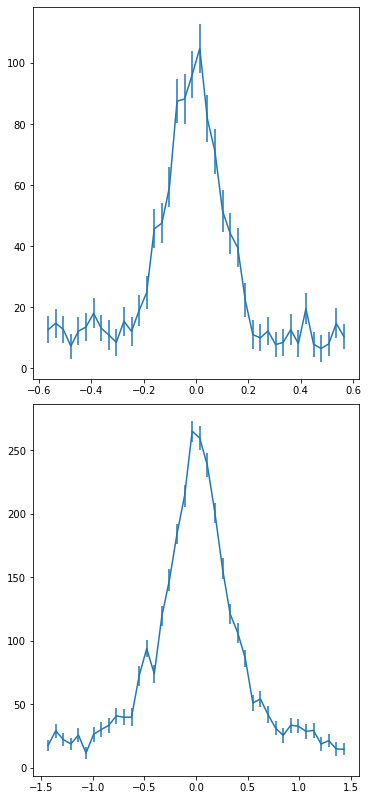

In [9]:
#declaring the variables to be plotted
##dataset 1
x1 = data_1[0]
y1 = data_1[1]
y1_err = data_1[2]

#dataset 2
x2 = data_2[0]
y2 = data_2[1]
y2_err = data_2[2]


#and now, we plot
fig, ax = plt.subplots(2,
                      figsize=(5,11),
                       constrained_layout=True
                      )

ax[0].errorbar(x1, y1, yerr = y1_err)
ax[1].errorbar(x2, y2, yerr = y2_err)

[[Model]]
    (Model(voigt) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2882
    # data points      = 40
    # variables        = 5
    chi-square         = 736.575760
    reduced chi-square = 21.0450217
    Akaike info crit   = 126.525306
    Bayesian info crit = 134.969703
[[Variables]]
    amplitude:  19.0960147 +/- 2.54589892 (13.33%) (init = -100000)
    center:    -0.00819382 +/- 0.00350314 (42.75%) (init = 0.6)
    sigma:      0.10682125 +/- 0.01557170 (14.58%) (init = 2)
    c:          12.3638182 +/- 1.87349590 (15.15%) (init = 25000)
    gamma:     -0.02208503 +/- 0.03577030 (161.97%) (init = 0.2)
    fwhm:       0.22876796 +/- 0.00860761 (3.76%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     84.7915810 +/- 2.52134537 (2.97%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, gamma)   

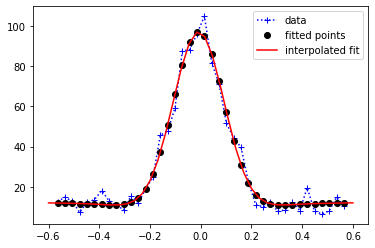

In [48]:
#the time has now come to take over the world with our coding capabilities
## we shall now come up with the Voigt model for our data in the form of Voigt + Constant

model = VoigtModel() + ConstantModel()

#parameters
params = model.make_params(amplitude=-1e5, center=0.6, 
                           sigma=2, gamma=0.2, c=25000)
params["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit, print out report with results 
result = model.fit(y1, params, x=x1)
print(result.fit_report())


# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
plt.plot(x1, y1, 'b+:', label='data')
plt.plot(x1, result.best_fit, 'ko', label='fitted points')
plt.plot(xx, result.eval(x=xx), 'r-', label='interpolated fit')
plt.legend()
plt.show()

[[Model]]
    (Model(gaussian) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 805
    # data points      = 40
    # variables        = 4
    chi-square         = 747.331164
    reduced chi-square = 20.7591990
    Akaike info crit   = 125.105158
    Bayesian info crit = 131.860676
[[Variables]]
    amplitude:  21.0511473 +/- 0.74506220 (3.54%) (init = -100000)
    center:    -0.00840195 +/- 0.00294519 (35.05%) (init = 1.2)
    sigma:      0.09663379 +/- 0.00331384 (3.43%) (init = 2)
    c:          11.1024628 +/- 0.96600607 (8.70%) (init = 0)
    fwhm:       0.22755518 +/- 0.00780350 (3.43%) == '2.3548200*sigma'
    height:     86.9074179 +/- 2.39341555 (2.75%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.688
    C(amplitude, c)     = -0.666
    C(sigma, c)         = -0.458


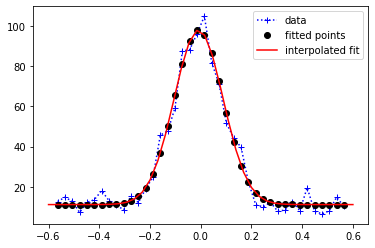

In [35]:
##and now for the Gaussian model (two "convoluted" Gauss)

modelg = GaussianModel() + ConstantModel()

#parameters
params = modelg.make_params(amplitude=-1e5, center=1.2, 
                           sigma=2)


# do the fit, print out report with results 
result = modelg.fit(y1, params, x=x1)
print(result.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
plt.plot(x1, y1, 'b+:', label='data')
plt.plot(x1, result.best_fit, 'ko', label='fitted points')
plt.plot(xx, result.eval(x=xx), 'r-', label='interpolated fit')
plt.legend()
plt.show()

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 173
    # data points      = 40
    # variables        = 4
    chi-square         = 1397.67411
    reduced chi-square = 38.8242809
    Akaike info crit   = 150.147413
    Bayesian info crit = 156.902931
[[Variables]]
    amplitude:  37.0966944 +/- 1.64755151 (4.44%) (init = -1e+10)
    center:    -0.00867905 +/- 0.00404133 (46.56%) (init = 0.3)
    sigma:      0.01427358 +/- 0.04795243 (335.95%) (init = 2)
    gamma:      0.11494997 +/- 0.01366512 (11.89%) (init = 0.2)
    fwhm:       0.23505574 +/- 0.01507715 (6.41%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     101.209345 +/- 4.00967669 (3.96%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, gamma)     = -0.902
    C(amplitude, gamma) = 0.797
    C(amplitude, sigma) = -0.611


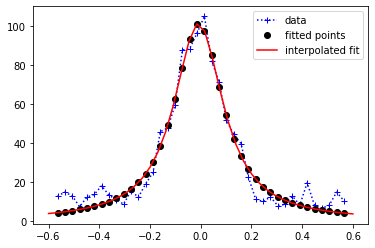

In [37]:
##here we do a model

modelv = VoigtModel()

#parameters
params = modelv.make_params(amplitude=-1e10, center=0.3, 
                           sigma=2, gamma=0.2)
params["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit, print out report with results 
result = modelv.fit(y1, params, x=x1)
print(result.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
plt.plot(x1, y1, 'b+:', label='data')
plt.plot(x1, result.best_fit, 'ko', label='fitted points')
plt.plot(xx, result.eval(x=xx), 'r-', label='interpolated fit')
plt.legend()
plt.show()